In [228]:
from intake import open_catalog
from datetime import date
import numpy as np
import pandas as pd
import scipy.io
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline

### Eddy dataset in MAT

In [3]:
fn1 = '/home/jovyan/RCLVs/SCS/eds_28d.mat'
data1 = scipy.io.loadmat(fn1)

fn2 = '/home/jovyan/RCLVs/SCS/eds_28d_trk.mat'
data2 = scipy.io.loadmat(fn2)

fn3 = '/home/jovyan/RCLVs/SCS/t_eddy.mat'
data3 = scipy.io.loadmat(fn3)

In [9]:
print(data1['eds_28d'].shape)
print(data2['eds_28d_trk'].shape)
print(data3['t_eddy'].shape)

(9496, 1)
(1999, 1)
(9496, 1)


#### *A total of 1999 SSH eddies are identified in the South China Sea based on the Altimetry from 1993 to 2018, which is carried out by Y. He.*

#### *Notice:The Lagrangian particles are employed from 1993 to 2015.*

- time

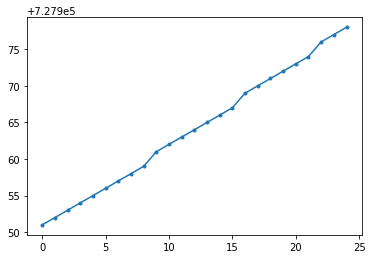

In [36]:
time_var = data2['eds_28d_trk'][0, 0]['time']
plt.plot(time_var[0, :], '.-')

- boundary

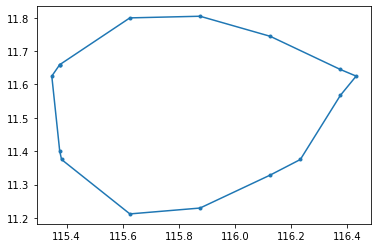

In [30]:
bound_var = data2['eds_28d_trk'][0, 0]['edgeline'][0, 0]
plt.plot(bound_var[0], bound_var[1], '.-')

### Date calculation

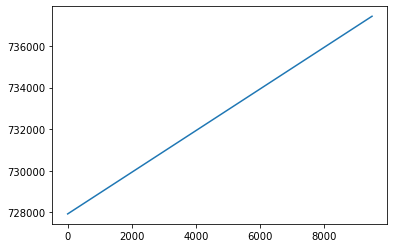

In [52]:
plt.plot(data3['t_eddy'])

In [53]:
data3['t_eddy'][0]

array([727930], dtype=int32)

In [55]:
data3['t_eddy'][-1]

array([737425], dtype=int32)

In [73]:
data3['t_eddy'][-1] - data3['t_eddy'][0]

array([9495], dtype=int32)

In [72]:
date.toordinal(date(2018, 12, 31)) - date.toordinal(date(1993, 1, 1))

9495

In [74]:
date_id = np.arange(9495)

In [76]:
id080301 = date.toordinal(date(2008, 3, 1))- date.toordinal(date(1993, 1, 1)) - 1
id080301

5537

- A random day is selected to look at the eddies and Lagrangian particles

### Random cases (2008-03-01)

In [85]:
eddy_ds = data1['eds_28d'][id080301, 0][0, :]
print(eddy_ds.shape)

(11,)


- eddy boundaries

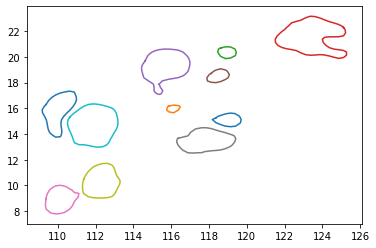

In [95]:
for i in np.arange(11):
    var_tmp = eddy_ds['edgeline'][i]
    plt.plot(var_tmp[0, :], var_tmp[1, :])

- Load the AVSIO

In [244]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds_aviso  = cat["sea_surface_height"].to_dask()
ds_aviso

/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0


<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2014-02-26T16:09:13Z
    date_issued:                     2014-01-06T00:00:00Z
    date_modified:                   2015-11-10T19:42:51Z
    geospatial_lat_max:              89.875
    geospatial_lat_min:              -89.875
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.875
    geospatial_lon_min:              0.125
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2014-02-26T16:09:13Z: created by DUACS D...
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        ERS-1, Topex/Poseidon
    processing_level:                L4
    product_version:                 5.0
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

(0.0, 28.0)

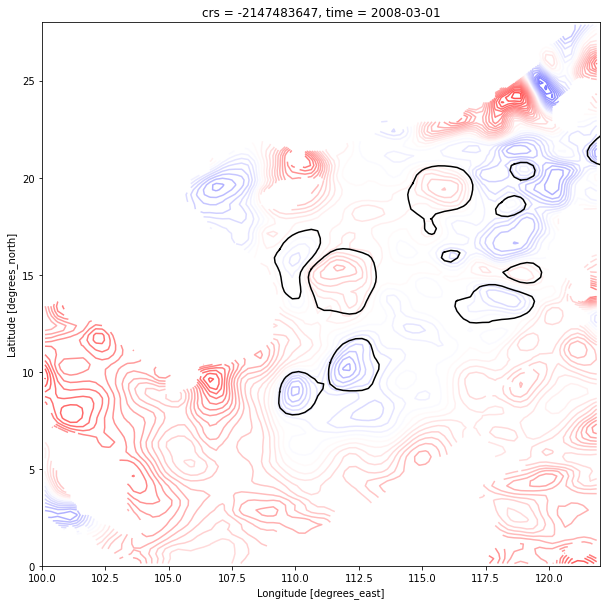

In [101]:
lev1 = np.arange(-0.5, 0.5, 0.02)
fig = plt.figure(figsize=(10, 10))
ds_aviso.sel(longitude=slice(100, 122), latitude=slice(0, 28), time='2008-03-01').sla.plot.contour(levels=lev1, 
                                                        vmin=-0.3, vmax=0.3, cmap='bwr', extend='both')
for i in np.arange(11):
    var_tmp = eddy_ds['edgeline'][i]
    plt.plot(var_tmp[0, :], var_tmp[1, :], 'k')

plt.xlim(100, 122)
plt.ylim(0, 28)

- The eddy boundary could be matched with the SSH contour. This identification looks good.

### Lagrangian particles

In [105]:
from floater import rclv
import gcsfs
import xarray as xr

In [106]:
gcs = gcsfs.GCSFileSystem(requester_pays=True)
ds = xr.open_zarr(gcs.get_mapper('gs://pangeo-rclv-eddies/float_trajectories/2008-03-01.zarr'))
ds

<xarray.Dataset>
Dimensions:  (time: 19, x0: 11520, y0: 4800)
Coordinates:
  * time     (time) datetime64[ns] 2008-03-01 2008-03-11 ... 2008-08-28
  * x0       (x0) float32 0.01562 0.04688 0.07812 0.1094 ... 359.9 360.0 360.0
  * y0       (y0) float32 -79.98 -79.95 -79.92 -79.89 ... 69.92 69.95 69.98
Data variables:
    lavd     (time, y0, x0) float32 dask.array<chunksize=(1, 2400, 2880), meta=np.ndarray>
    u        (time, y0, x0) float32 dask.array<chunksize=(1, 2400, 2880), meta=np.ndarray>
    v        (time, y0, x0) float32 dask.array<chunksize=(1, 2400, 2880), meta=np.ndarray>
    vort     (time, y0, x0) float32 dask.array<chunksize=(1, 2400, 2880), meta=np.ndarray>
    x        (time, y0, x0) float32 dask.array<chunksize=(1, 2400, 2880), meta=np.ndarray>
    y        (time, y0, x0) float32 dask.array<chunksize=(1, 2400, 2880), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7
    creator_email:          liutongya@sio.org.cn and rpa@ldeo.columbia.edu
    creator_name:           Tongya Liu and Ryan Abernathey
    id:                     SLaPS_v0.1.1_2008-03-01
    institution:            Lamont Doherty Earth Observatory of Columbia Univ...
    naming_authority:       edu.columbia.ldeo
    product_version:        0.1.1
    simulation_start_date:  2008-03-01
    source:                 Numerical Lagrangian simulation driven by remote ...
    summary:                This dataset was produced by using MITgcm in offl...
    title:                  Surface Lagrangian Particle Simulations Starting ...

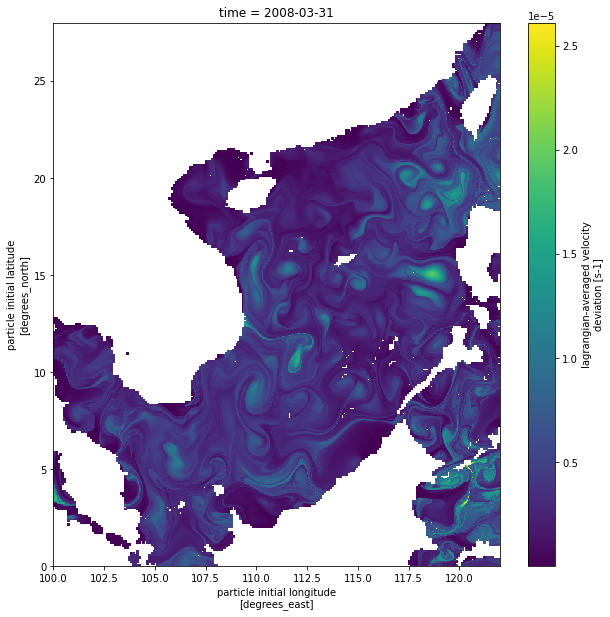

In [114]:
fig = plt.figure(figsize=(10, 10))
ds.sel(x0=slice(100, 122), y0=slice(0, 28), time='2008-03-31').lavd.plot()

- Based on the rough view of the LAVD field, the coherent structure (Lagrangian eddies) is very few.

In [220]:
ds_new = ds.sel(x0=slice(100, 130), y0=slice(0, 28))
ds_new

<xarray.Dataset>
Dimensions:  (time: 19, x0: 960, y0: 896)
Coordinates:
  * time     (time) datetime64[ns] 2008-03-01 2008-03-11 ... 2008-08-28
  * x0       (x0) float32 100.0 100.0 100.1 100.1 ... 129.9 129.9 130.0 130.0
  * y0       (y0) float32 0.01562 0.04688 0.07812 0.1094 ... 27.92 27.95 27.98
Data variables:
    lavd     (time, y0, x0) float32 dask.array<chunksize=(1, 896, 960), meta=np.ndarray>
    u        (time, y0, x0) float32 dask.array<chunksize=(1, 896, 960), meta=np.ndarray>
    v        (time, y0, x0) float32 dask.array<chunksize=(1, 896, 960), meta=np.ndarray>
    vort     (time, y0, x0) float32 dask.array<chunksize=(1, 896, 960), meta=np.ndarray>
    x        (time, y0, x0) float32 dask.array<chunksize=(1, 896, 960), meta=np.ndarray>
    y        (time, y0, x0) float32 dask.array<chunksize=(1, 896, 960), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7
    creator_email:          liutongya@sio.org.cn and rpa@ldeo.columbia.edu
    creator_name:           Tongya Liu and Ryan Abernathey
    id:                     SLaPS_v0.1.1_2008-03-01
    institution:            Lamont Doherty Earth Observatory of Columbia Univ...
    naming_authority:       edu.columbia.ldeo
    product_version:        0.1.1
    simulation_start_date:  2008-03-01
    source:                 Numerical Lagrangian simulation driven by remote ...
    summary:                This dataset was produced by using MITgcm in offl...
    title:                  Surface Lagrangian Particle Simulations Starting ...

- transfer lon, lat to x, y

In [221]:
dx = 32 * (130 - 100)
dy = 32 * (28 - 0)

/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0


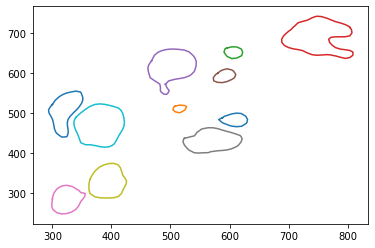

In [225]:
contour = []
for i in np.arange(11):
    var_tmp = eddy_ds['edgeline'][i]
    num2 = var_tmp[1, :] / 28 * dy
    num1 = (var_tmp[0, :] - 100) / 30 * dx
    
    var_tmp2 = np.zeros((var_tmp.shape[1], 2))
    var_tmp2[:, 1] = num1
    var_tmp2[:, 0] = num2
    contour.append(var_tmp2)
    
    #for j in np.arange(var_tmp.shape[1]):
       # contour.append([num1, num2])
    plt.plot(num1, num2)

In [226]:
labels = rclv.label_points_in_contours(ds_new.x[0, :, :].shape, contour)

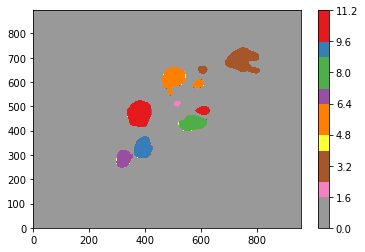

In [227]:
plt.contourf(labels, cmap='Set1_r', levels=13)
plt.colorbar()

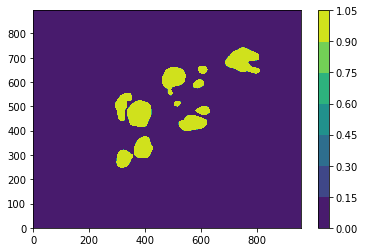

In [231]:
mask = deepcopy(labels)
mask[mask > 0] = 1
plt.contourf(mask)
plt.colorbar()

- SSH eddies are labeled by 1, the rest part is 0.

In [251]:
ed_x0 = ds_new.x[0, :, :] * mask
ed_y0 = ds_new.y[0, :, :] * mask

ed_x1 = ds_new.x[3, :, :] * mask
ed_y1 = ds_new.y[3, :, :] * mask

ed_x2 = ds_new.x[6, :, :] * mask
ed_y2 = ds_new.y[6, :, :] * mask

/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
/home/jovyan/RCLVs/floater/floater/rclv.py:220: RuntimeWarning

(0.0, 25.0)

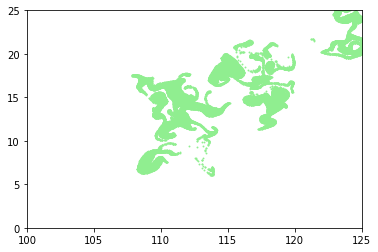

In [242]:
plt.scatter(ed_x2, ed_y2, s=1, marker='h', color='lightgreen')
plt.xlim(100, 125)
plt.ylim(0, 25)

Text(0.5, 1.0, '2008-04-30')

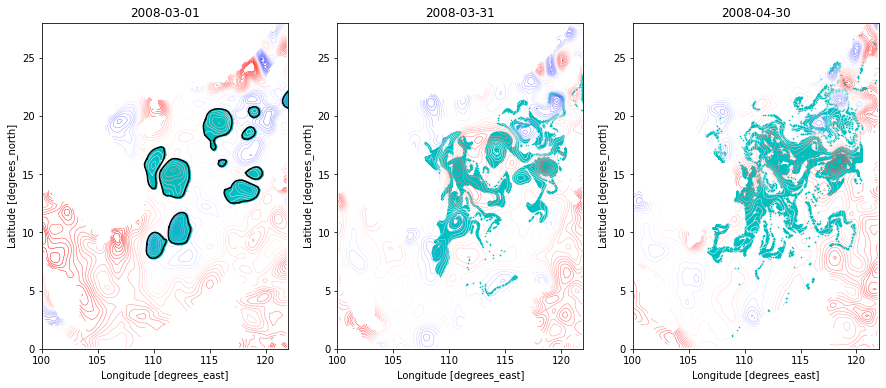

In [255]:
fig = plt.figure(figsize=(15, 6))

plt.subplot(131)
lev1 = np.arange(-0.3, 0.3, 0.02)

ds_aviso.sel(longitude=slice(100, 122), latitude=slice(0, 28), time='2008-03-01').sla.plot.contour(levels=lev1, 
                                                        vmin=-0.3, vmax=0.3, cmap='bwr', extend='both', linewidths=0.5)
for i in np.arange(11):
    var_tmp = eddy_ds['edgeline'][i]
    plt.plot(var_tmp[0, :], var_tmp[1, :], 'k')
    
plt.scatter(ed_x0, ed_y0, s=0.5, marker='h', color='c')
    
plt.xlim(100, 122)
plt.ylim(0, 28)
plt.title('2008-03-01')

plt.subplot(132)
lev1 = np.arange(-0.3, 0.3, 0.02)

ds_aviso.sel(longitude=slice(100, 122), latitude=slice(0, 28), time='2008-03-31').sla.plot.contour(levels=lev1, 
                                                        vmin=-0.3, vmax=0.3, cmap='bwr', extend='both', linewidths=0.5)

plt.scatter(ed_x1, ed_y1, s=0.5, marker='h', color='c')

    
plt.xlim(100, 122)
plt.ylim(0, 28)
plt.title('2008-03-31')

plt.subplot(133)
lev1 = np.arange(-0.3, 0.3, 0.02)

ds_aviso.sel(longitude=slice(100, 122), latitude=slice(0, 28), time='2008-04-30').sla.plot.contour(levels=lev1, 
                                                        vmin=-0.3, vmax=0.3, cmap='bwr', extend='both', linewidths=0.5)

plt.scatter(ed_x2, ed_y2, s=0.5, marker='h', color='c')

    
plt.xlim(100, 122)
plt.ylim(0, 28)
plt.title('2008-04-30')


### *After 30 or 60 days, a lot of Lagrangian particles are not located in the SSH contours, which means that SSH eddies are highly leaky in transporting water!*
### *The statistical analysis for all SSH eddies in the South China Sea is deserved to be carried out.*